In [1]:
import pandas as pd

In [44]:
df = pd.read_csv('final_merged_df_correction.csv')
df


,지역별,시점,아파트매매가격지수,인구밀도,사교육참여율,고용률,여성초혼연령,인터넷이용률,합계출산율,근로시간
0,강원,2015.01,82.1,90.2,61.6,51.7,29.62,74.1,1.311,173.1
1,경기,2015.01,89.6,1227.9,71.7,60.8,30.04,86.3,1.272,175.2
2,경남,2015.01,105.3,316.4,65.7,58.3,29.76,86.4,1.437,172.2
3,경북,2015.01,109.4,140.8,64.2,59.2,29.55,86.6,1.464,170.6
4,광주,2015.01,87.7,2998.5,66.0,57.6,30.09,90.2,1.207,171.5
...,...,...,...,...,...,...,...,...,...,...
1723,전남,2023.12,107.1,144.1,64.8,64.8,30.85,95.5,0.975,150.4
1724,전북,2023.12,107.9,218.4,61.5,61.5,31.12,94.5,0.746,145.8
1725,제주,2023.12,108.0,366.0,87.3,69.0,31.68,83.8,0.743,147.4
1726,충남,2023.12,104.7,271.5,81.0,62.2,31.31,98.1,0.781,149.4


In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

# 한글 폰트 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

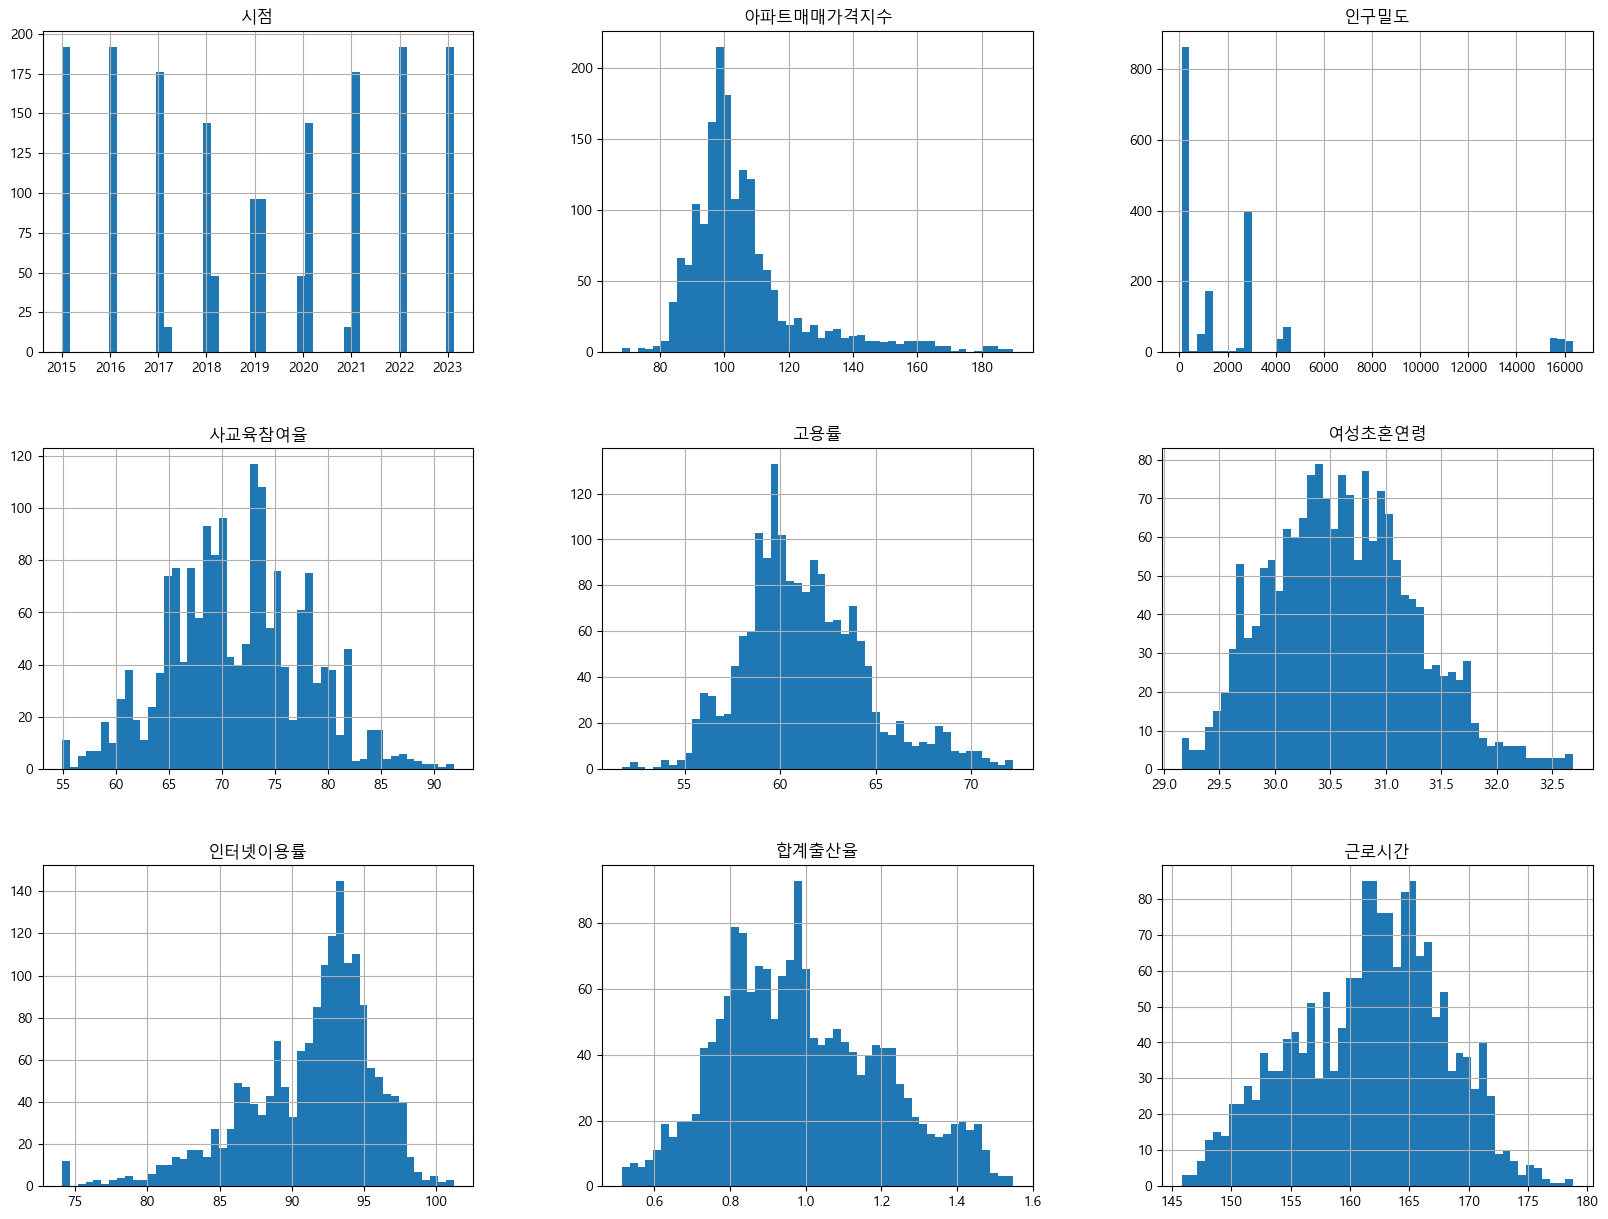

In [46]:
## 전체적인 데이터 경향성 및 분포 확인
df.hist(bins = 50, figsize = (20,15))
plt.show()

In [47]:
df.head()

,지역별,시점,아파트매매가격지수,인구밀도,사교육참여율,고용률,여성초혼연령,인터넷이용률,합계출산율,근로시간
0,강원,2015.01,82.1,90.2,61.6,51.7,29.62,74.1,1.311,173.1
1,경기,2015.01,89.6,1227.9,71.7,60.8,30.04,86.3,1.272,175.2
2,경남,2015.01,105.3,316.4,65.7,58.3,29.76,86.4,1.437,172.2
3,경북,2015.01,109.4,140.8,64.2,59.2,29.55,86.6,1.464,170.6
4,광주,2015.01,87.7,2998.5,66.0,57.6,30.09,90.2,1.207,171.5


In [48]:
df['지역별'].unique()


array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '울산', '인천',
       '전남', '전북', '제주', '충남', '충북'], dtype=object)

In [49]:
# 지역 레이블 인코딩
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 생성
label_encoder = LabelEncoder()

# 인코딩할 값 지정
regions = df['지역별'].unique().tolist()

# 지역별 칼럼에 레이블 인코딩 적용
df['지역별_인코딩'] = label_encoder.fit_transform(df['지역별'])

# 결과 확인
df[['지역별', '지역별_인코딩']].head(20)


,지역별,지역별_인코딩
0,강원,0
1,경기,1
2,경남,2
3,경북,3
4,광주,4
5,대구,5
6,대전,6
7,부산,7
8,서울,8
9,울산,9


In [50]:
df.head()

,지역별,시점,아파트매매가격지수,인구밀도,사교육참여율,고용률,여성초혼연령,인터넷이용률,합계출산율,근로시간,지역별_인코딩
0,강원,2015.01,82.1,90.2,61.6,51.7,29.62,74.1,1.311,173.1,0
1,경기,2015.01,89.6,1227.9,71.7,60.8,30.04,86.3,1.272,175.2,1
2,경남,2015.01,105.3,316.4,65.7,58.3,29.76,86.4,1.437,172.2,2
3,경북,2015.01,109.4,140.8,64.2,59.2,29.55,86.6,1.464,170.6,3
4,광주,2015.01,87.7,2998.5,66.0,57.6,30.09,90.2,1.207,171.5,4


In [51]:
df = df[['지역별', '시점', '아파트매매가격지수', '인구밀도', '사교육참여율', '고용률', '여성초혼연령', '인터넷이용률',
        '근로시간', '지역별_인코딩','합계출산율']]
df.head()

,지역별,시점,아파트매매가격지수,인구밀도,사교육참여율,고용률,여성초혼연령,인터넷이용률,근로시간,지역별_인코딩,합계출산율
0,강원,2015.01,82.1,90.2,61.6,51.7,29.62,74.1,173.1,0,1.311
1,경기,2015.01,89.6,1227.9,71.7,60.8,30.04,86.3,175.2,1,1.272
2,경남,2015.01,105.3,316.4,65.7,58.3,29.76,86.4,172.2,2,1.437
3,경북,2015.01,109.4,140.8,64.2,59.2,29.55,86.6,170.6,3,1.464
4,광주,2015.01,87.7,2998.5,66.0,57.6,30.09,90.2,171.5,4,1.207


In [52]:
df.drop(columns=['지역별'], inplace=True)


C:\Users\psh10\AppData\Local\Temp\ipykernel_24972\4213552200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['지역별'], inplace=True)


In [53]:
# 상관관계 계산
corr_matrix = df.corr()
corr_matrix

,시점,아파트매매가격지수,인구밀도,사교육참여율,고용률,여성초혼연령,인터넷이용률,근로시간,지역별_인코딩,합계출산율
시점,1.000000e+00,0.487528,-0.012754,0.553896,0.165930,0.758107,0.513527,-0.682536,-3.792423e-15,-0.806433
아파트매매가격지수,4.875283e-01,1.000000,0.362599,0.564785,-0.008626,0.558722,0.307444,-0.287210,-8.460747e-02,-0.522546
인구밀도,-1.275400e-02,0.362599,1.000000,0.474446,-0.278945,0.493540,0.147481,0.040440,-4.006147e-02,-0.436920
사교육참여율,5.538959e-01,0.564785,0.474446,1.000000,-0.159548,0.796039,0.584262,-0.345489,-2.796492e-01,-0.755705
고용률,1.659300e-01,-0.008626,-0.278945,-0.159548,1.000000,0.032458,-0.170325,-0.107082,3.601939e-01,0.149623
여성초혼연령,7.581071e-01,0.558722,0.493540,0.796039,0.032458,1.000000,0.496810,-0.452334,-1.447836e-01,-0.886860
인터넷이용률,5.135267e-01,0.307444,0.147481,0.584262,-0.170325,0.496810,1.000000,-0.418363,-1.967843e-02,-0.583300
근로시간,-6.825357e-01,-0.287210,0.040440,-0.345489,-0.107082,-0.452334,-0.418363,1.000000,2.632025e-02,0.511231
지역별_인코딩,-3.792423e-15,-0.084607,-0.040061,-0.279649,0.360194,-0.144784,-0.019678,0.026320,1.000000e+00,0.131228
합계출산율,-8.064331e-01,-0.522546,-0.436920,-0.755705,0.149623,-0.886860,-0.583300,0.511231,1.312285e-01,1.000000


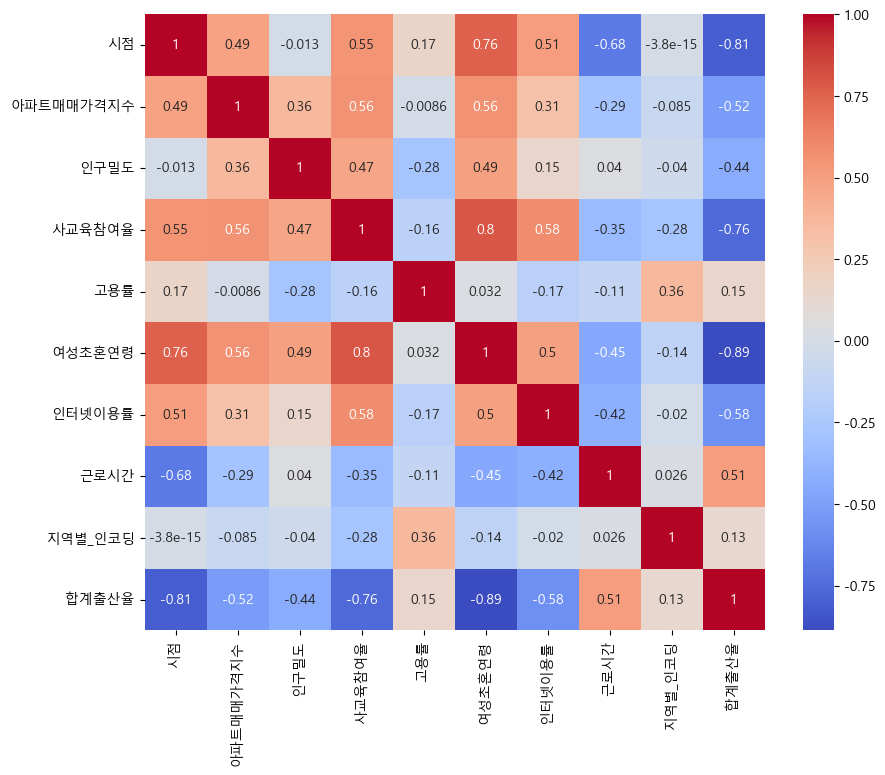

In [54]:
# 히트맵 작성
plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

####
0.0 ~ 0.2: 매우 약한 상관관계 (거의 무시할 수 있는 수준)

0.2 ~ 0.4: 약한 상관관계 (상관관계가 있지만 약함)

0.4 ~ 0.6: 중간 정도의 상관관계 (상당한 상관관계)

0.6 ~ 0.8: 강한 상관관계 (의미 있는 상관관계)

0.8 ~ 1.0: 매우 강한 상관관계 (매우 높은 상관관계)

유의미한 상관관계란?
0.4 이상이면 실무적으로나 연구에서 중요한 관계로 간주하는 경우가 많습니다.
0.6 이상일 때는 매우 강한 관계로 해석되며, 예측 모델링이나 의사결정에서 매우 중요하게 다뤄집니다.

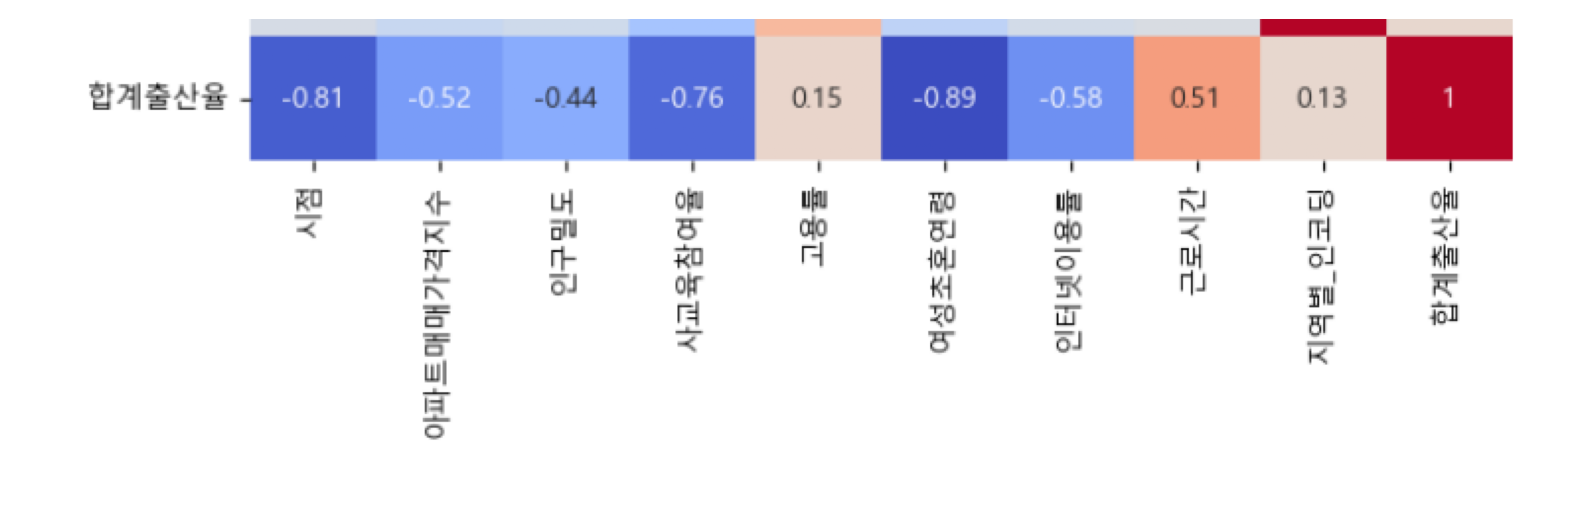

In [55]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 이미지 경로 지정
img = mpimg.imread('스크린샷.png')  # 'image_path.jpg'를 이미지 파일의 경로로 변경

# 이미지 표시
plt.figure(figsize=(10, 10), dpi=200) 
plt.imshow(img)
plt.axis('off')  # 축을 숨깁니다
plt.show()

매우 강한 상관관계(0.8 ~ 1.0) : 시점, 여성초혼연령
강한 상관관계(0.6 ~ 0.8) : 사교육참여율
중간 정도의 상관관계 (0.4 ~ 0.6) : 인구밀도, 아파트매매가격지수, 인터넷이용률, 근로시간
매우 약한 상관관계 (0.0 ~ 0.2) : 고용률, 지역별_인코딩

## 머신러닝

In [58]:
# 입력변수 & 목표변수 구분하기
X = df.drop('합계출산율', axis = 1)
y = df['합계출산율']

In [59]:
# 학습데이터 & 테스트데이터 구분
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [60]:
# 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
#  model 평가 함수
def model_evaluation(model, X_train, X_test, y_train, y_test):
   # MSE
    from sklearn.metrics import mean_squared_error
    y_pred = model.predict(X_test) # y_pred : 수능 문제 푼 결과
    mse = mean_squared_error(y_test, y_pred)
    print("MSE:", mse)

    # r2_score
    from sklearn.metrics import r2_score
    # 수능(테스트) 점수
    y_test_pred = model.predict(X_test) # y_pred : 수능 문제 푼 결과
    test_r2 = r2_score(y_test, y_test_pred)
    print("r2_score:", test_r2)

    y_train_pred = model.predict(X_train) # y_pred : 수능 문제 푼 결과
    train_r2 = r2_score(y_train, y_train_pred)
    print("R-squared:", train_r2)

In [77]:
# 모델 선택(linear regression)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
    # 모델 학습
model.fit(X_train, y_train)

model_evaluation(model, X_train, X_test, y_train, y_test)

MSE: 0.004401735074756488
r2_score: 0.90781694271439
R-squared: 0.906083138194955


In [78]:
# 모델 선택(KNN)
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
model.fit(X_train, y_train)
model_evaluation(model, X_train, X_test, y_train, y_test)

MSE: 0.0003467612716763009
r2_score: 0.9927379740878349
R-squared: 0.9966866018195663


In [79]:
# 모델 선택(Decision Tree)
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
model_evaluation(model, X_train, X_test, y_train, y_test)

MSE: 0.00035617630057803456
r2_score: 0.9925408004429304
R-squared: 1.0


In [80]:
# 모델 선택(Ridge)
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, y_train)
model_evaluation(model, X_train, X_test, y_train, y_test)

MSE: 0.00440057313913337
r2_score: 0.9078412764773922
R-squared: 0.9060818700652515


In [81]:
# 모델 선택(Lasso)
from sklearn.linear_model import Lasso
model = Lasso(alpha=1.0)
model.fit(X_train, y_train)
model_evaluation(model, X_train, X_test, y_train, y_test)

MSE: 0.04795634157558344
r2_score: -0.0043226381394285696
R-squared: 0.0


In [82]:
# 모델 선택(RandomForestRegressor)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
model_evaluation(model, X_train, X_test, y_train, y_test)

MSE: 0.00015094531040462424
r2_score: 0.9968388374221288
R-squared: 0.9993538958692846


In [83]:
# 모델 선택(GradientBoostingRegressor)
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
model_evaluation(model, X_train, X_test, y_train, y_test)

MSE: 0.0004145143399977921
r2_score: 0.9913190597569443
R-squared: 0.9947461563920584


In [84]:
!pip install xgboost


In [85]:
# 모델 선택(xgboost)
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
model_evaluation(model, X_train, X_test, y_train, y_test)

MSE: 0.00013255919775409094
r2_score: 0.9972238874187639
R-squared: 0.9999450040620277
